# Project 07 Machine Learning

#### Lee Strickland 
#### For this final project I will be using a type of supervised learning, simple linear regression, to train a model and use the resulting model (a "best-fit" straight line) to make predictions. 

#### link to GitHub project repository: https://github.com/ForeverGrateful70/datafun-07-ml

In [1]:
# Import dependencies

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow as pa
import numpy as np
import scipy
import sklearn


## Part One: Chart a Straight Line

#### Linear Relationship, Plotting Celsius vs. Fahrenheit

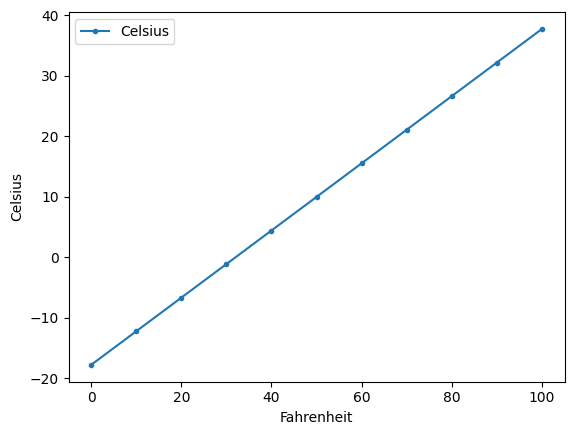

In [2]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
import pandas as pd
import matplotlib.pyplot as plt
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part Two: Predictions

#### Section One: Data Aquistion

In [3]:
#Load dataset 
df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

#### Section Two: Data Inspection

In [4]:
#Get general information about the data
df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [5]:
df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### Section Three: Data Cleaning

In [6]:
#Update column names 
df.columns = ['Date', 'Temperature', 'Anomaly']
df.head()

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [7]:
#Column type
df.Date.dtype

dtype('int64')

In [8]:
#Truncate last two digits of date
df.Date = df.Date.floordiv(100)

df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


#### Section Four: Descriptive Statistics

In [9]:
#Set precision for floating point numbers, updated error from textbook
pd.set_option('display.precision', 2)

In [10]:
#Use descriptive statistics
df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

#### Section Five: Build the Model

In [11]:
from scipy import stats
linear_regression = stats.linregress(x=df.Date, y=df.Temperature)

print(f'Statistics:' , stats.linregress(x=df.Date, y=df.Temperature))

Statistics: LinregressResult(slope=0.014771361132966163, intercept=8.694993233674289, rvalue=0.1169376670075292, pvalue=0.19586679787456207, stderr=0.011357855112603288, intercept_stderr=22.22536216679513)


In [12]:
linear_regression.slope
linear_regression.intercept

print(f'Slope:', linear_regression.slope)
print(f'Intercept:', linear_regression.intercept)

Slope: 0.014771361132966163
Intercept: 8.694993233674289


#### Section Six: Predictions

In [13]:
linear_regression.slope*2024+linear_regression.intercept
print(f'Predicted Average Temperature 2024:', linear_regression.slope*2024+linear_regression.intercept)

Predicted Average Temperature 2024: 38.5922281667978


#### Section Seven: Visualizations

(10.0, 70.0)

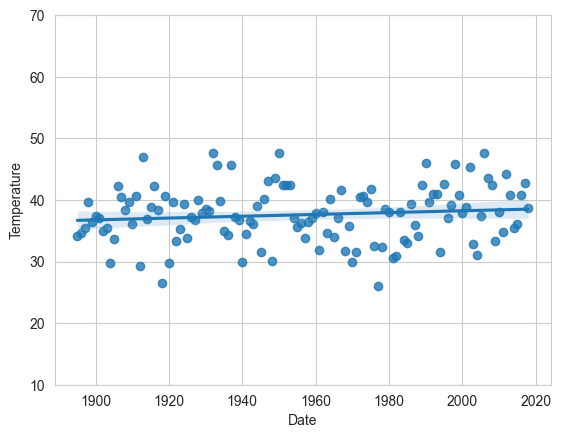

In [14]:
import seaborn as sns
sns.set_style('whitegrid')
axes=sns.regplot(x=df.Date, y=df.Temperature)
axes.set_ylim(10, 70)

## Part Three: Predictions

#### Section One: Build the Model

In [16]:
#Use test_train_split to split the data into seperate parts for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.Date.values.reshape(-1, 1), df.Temperature.values, random_state=11)

In [17]:
#Check shape of each dataset
X_train.shape
X_test.shape

print(f'X_train shape check' , X_train.shape)
print(f'X_test shape check' , X_test.shape)

X_train shape check (93, 1)
X_test shape check (31, 1)


In [18]:
#Train model using Linear Regression Fit
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [19]:
#Determine coefficient and intercept
linear_regression.coef_
linear_regression.intercept_

print(f'Coefficient:', linear_regression.coef_)
print(f'Intercept:', linear_regression.intercept_)

Coefficient: [0.01939167]
Intercept: -0.30779820252656265


#### Section Two: Test the Model

In [20]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected[::5]):
    print(f'Predicted: {p:.2f}, Expected: {e:.2f}')

Predicted: 37.86, Expected: 31.70
Predicted: 38.69, Expected: 34.80
Predicted: 37.00, Expected: 39.40
Predicted: 37.25, Expected: 45.70
Predicted: 38.05, Expected: 32.30
Predicted: 37.64, Expected: 33.80
Predicted: 36.94, Expected: 39.70


#### Section Three: Predictions

In [21]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2024)

print(f'Predicted Average Temperature 2024:', predict(2024))

Predicted Average Temperature 2024: [38.94094855]


#### Section Four: Visualizations

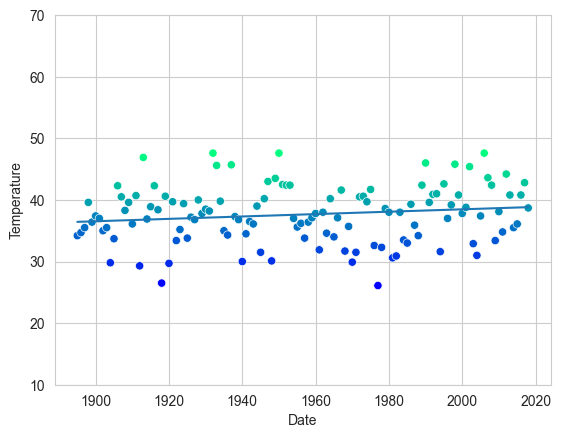

In [22]:
#Visualize the data with regression line
import seaborn as sns
axes = sns.scatterplot(data=df, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

x = np.array([min(df.Date.values), max(df.Date.values)])
y = predict(x)
line = plt.plot(x, y)

#### Part Four: Insights

##### Both methods appear to be similar in how they predict the outputs. For a dataset like this the statistical methods worked the best.  It is very impressive though to see how close the machine learning model was to the statistical model. For future datasets like this I would continue to use the statistical methods but if the dataset increases in size or requires automation then I would utilize the machine learning methods.

#### Wow! This class taught me a lot, thanks so much for your time, patience and enthusiasm.  I am excited to see what future classes hold.